<a href="https://colab.research.google.com/github/marceloppaz/recomendacao_imagem/blob/main/recomendacao_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definindo o tamanho das imagens
IMG_SIZE = (224, 224)

# Pré-processamento dos dados
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Carregar as imagens de treino
train_generator = datagen.flow_from_directory(
    '/content/dataset',  # Caminho para o dataset
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Carregar as imagens de validação
validation_generator = datagen.flow_from_directory(
    '/content/validation',  # Caminho para o dataset de validação
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)


Found 400 images belonging to 5 classes.
Found 381 images belonging to 5 classes.


In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Carregar o modelo pré-treinado ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar as camadas do modelo base
base_model.trainable = False

# Adicionar novas camadas para a tarefa de classificação
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.3740 - loss: 1.5528 - val_accuracy: 0.3990 - val_loss: 3.0464
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.4831 - loss: 1.1712 - val_accuracy: 0.5223 - val_loss: 2.9374
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5376 - loss: 0.9663 - val_accuracy: 0.5381 - val_loss: 2.6928
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5716 - loss: 0.9014 - val_accuracy: 0.4199 - val_loss: 2.6419
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6204 - loss: 0.8076 - val_accuracy: 0.4934 - val_loss: 2.3585
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6762 - loss: 0.7437 - val_accuracy: 0.5669 - val_loss: 2.1632
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6909 - loss: 0.6861 - val_accuracy: 0.4934 - val_loss: 2.2410
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6736 - loss: 0.7428 - val_accuracy: 0.5407 - val_loss: 2.2401
Epo

In [15]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validação - Perda: {val_loss}, Acurácia: {val_acc}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5617 - loss: 1.9873
Validação - Perda: 2.055274724960327, Acurácia: 0.569553792476654


Total de imagens encontradas: 400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━

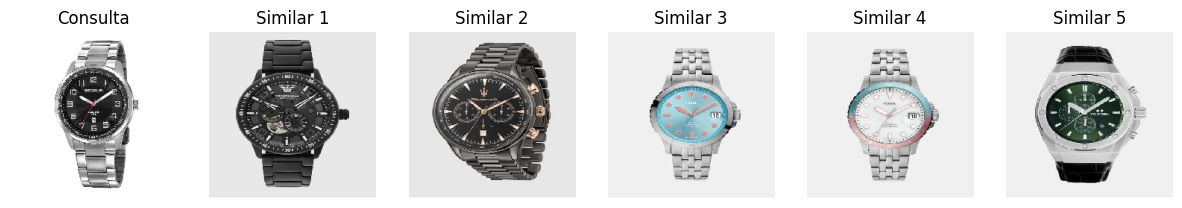

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity

# Configuração do modelo e tamanho da imagem
IMG_SIZE = (224, 224)  # Tamanho esperado pelo modelo
model = VGG16(weights="imagenet", include_top=False, pooling="avg")  # Usando VGG16 sem a última camada

# Função para extrair características de uma imagem
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalização
    features = model.predict(img_array)
    return features.flatten()

# Obter todos os caminhos das imagens no dataset
def get_image_paths(dataset_dir):
    image_paths = []
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Configuração do diretório do dataset
dataset_dir = "/content/dataset"  # Substitua pelo caminho do seu dataset
dataset_images_paths = get_image_paths(dataset_dir)

print(f"Total de imagens encontradas: {len(dataset_images_paths)}")

# Extrair características de todas as imagens do dataset
features = []
image_paths = []
for img_path in dataset_images_paths:
    feature = extract_features(img_path, model)
    features.append(feature)
    image_paths.append(img_path)

features = np.array(features)

# Função para encontrar imagens mais similares
def find_similar_images(query_image_path, model, features, image_paths, top_n=5):
    query_features = extract_features(query_image_path, model)
    similarities = cosine_similarity([query_features], features)
    most_similar_idx = similarities.argsort()[0][::-1][:top_n]  # Índices das imagens mais similares
    similar_images = [image_paths[i] for i in most_similar_idx]
    return similar_images

# Função para exibir imagens
def plot_images(image_paths, query_image_path):
    plt.figure(figsize=(15, 5))
    # Imagem de consulta
    query_img = image.load_img(query_image_path, target_size=IMG_SIZE)
    plt.subplot(1, len(image_paths) + 1, 1)
    plt.imshow(query_img)
    plt.axis('off')
    plt.title("Consulta")

    # Imagens similares
    for i, img_path in enumerate(image_paths):
        similar_img = image.load_img(img_path, target_size=IMG_SIZE)
        plt.subplot(1, len(image_paths) + 1, i + 2)
        plt.imshow(similar_img)
        plt.axis('off')
        plt.title(f"Similar {i + 1}")
    plt.show()

# Testar o sistema de recomendação com uma imagem de consulta
query_image_path = "relogio.jpg"  # Substitua pelo caminho da imagem de consulta
similar_images = find_similar_images(query_image_path, model, features, image_paths, top_n=5)

print("Imagens mais similares:")
for img in similar_images:
    print(img)

# Plotar as imagens mais similares
plot_images(similar_images, query_image_path)
